In [1]:
#Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
data = pd.read_excel('Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [4]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [7]:
data.Passengers.unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271], dtype=int64)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<function matplotlib.pyplot.show(close=None, block=None)>

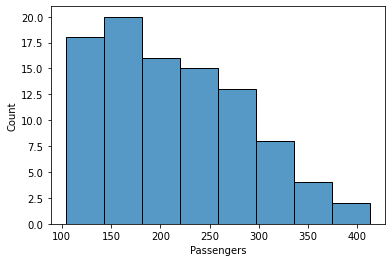

In [10]:
#Visualizing the passengers columns by histogram
sns.histplot(data=data['Passengers'])
plt.show

C:\Users\Vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

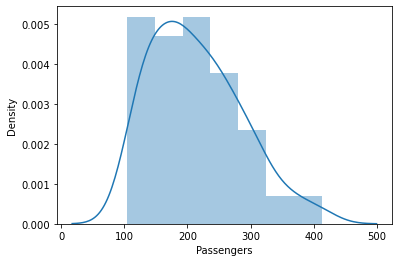

In [11]:
#by distplot
sns.distplot(data['Passengers'])
plt.show

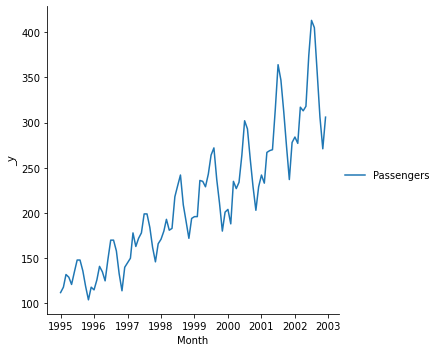

In [12]:
sns.relplot(data=data,kind='line')
plt.show()

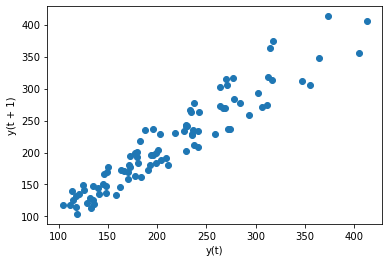

In [13]:
# Lagplot
from pandas.plotting import lag_plot
lag_plot(data['Passengers'])
plt.show()

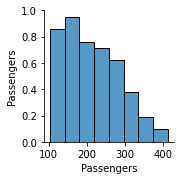

In [14]:
sns.pairplot(data)
plt.show()

C:\Users\Vicky\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


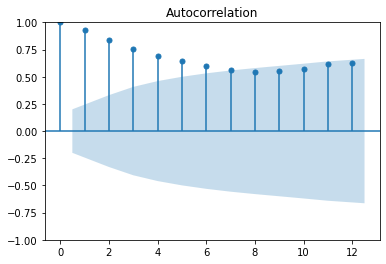

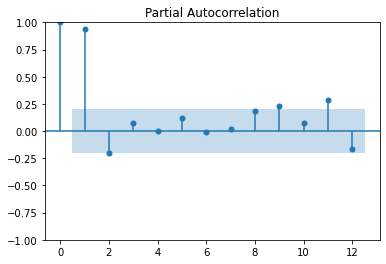

In [15]:
import statsmodels.graphics.tsaplots as tsa_plot
tsa_plot.plot_acf(data.Passengers,lags=12)

tsa_plot.plot_pacf(data.Passengers,lags=12)

plt.show()


### Data Driven Forecasting Methods

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

# Moving Average Method

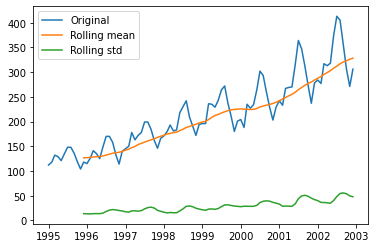

In [18]:
#Here finding the rolling mean and rolling standard divatuon and ploting in a same graph
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

orig = plt.plot(data , label = 'Original')
mean = plt.plot(rolmean,label = 'Rolling mean')
std = plt.plot(rolstd, label = 'Rolling std')

plt.legend(loc = 'best')
plt.show()

# Time Series Decomposition

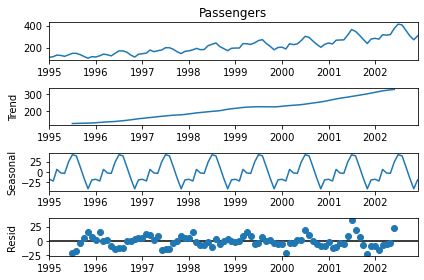

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### Evaluation of RMSE (Root Mean Square Error)

In [20]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## Simple Exponential Method

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

68.00674031350329

## Holt method



In [23]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

58.73470853297176

### Holts winter exponential smoothing with additive seasonality and additive trend

In [24]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

62.474130229523205

### Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.71671091426357

# MODEL BASED FORECASTING METHOD

In [26]:
# Data preprocessing for models
data1 = data.copy()
data1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [27]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_psngr"] = np.log(data1["Passengers"])

data1.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [28]:
# Splitting data into Train and Test (77/33)
Train = data1.head(84)
Test = data1.tail(12)

# Linear Model


In [29]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.19923653480265

## Exponential Model


In [30]:
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.05736110315619

## Quadratic Model


In [31]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.05188897933154

# ARIMA model


In [32]:
series = data.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [33]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset (1).csv', header=False)
validation.to_csv('validation (1).csv', header=False)

Dataset 84, Validation 12


# Persistence/Base model

In [34]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset (1).csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [35]:
print(train.shape)
print(test.shape)

(60,)
(24,)


In [36]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [54]:
 rmse_Persistence_model = 29.058

## ARIMA Hyperparameters

In [37]:
series = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [38]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [41]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=82.974
ARIMA(0, 0, 1) RMSE=46.377
ARIMA(0, 0, 2) RMSE=36.722
ARIMA(0, 1, 0) RMSE=28.546
ARIMA(0, 1, 1) RMSE=27.700
ARIMA(0, 1, 2) RMSE=28.147
ARIMA(0, 2, 0) RMSE=34.814
ARIMA(0, 2, 1) RMSE=28.811
ARIMA(0, 2, 2) RMSE=27.920
ARIMA(1, 0, 0) RMSE=28.703
ARIMA(1, 0, 1) RMSE=27.551
ARIMA(1, 0, 2) RMSE=28.044
ARIMA(1, 1, 0) RMSE=28.187
ARIMA(1, 1, 1) RMSE=27.474
ARIMA(1, 1, 2) RMSE=26.294
ARIMA(1, 2, 0) RMSE=34.419
ARIMA(1, 2, 1) RMSE=28.447
ARIMA(1, 2, 2) RMSE=27.783
ARIMA(2, 0, 0) RMSE=28.111
ARIMA(2, 0, 1) RMSE=27.869
ARIMA(2, 0, 2) RMSE=27.645
ARIMA(2, 1, 0) RMSE=27.665
ARIMA(2, 1, 1) RMSE=26.077
ARIMA(2, 1, 2) RMSE=26.204
ARIMA(2, 2, 0) RMSE=33.147
ARIMA(2, 2, 1) RMSE=27.972
ARIMA(2, 2, 2) RMSE=27.996
ARIMA(4, 0, 0) RMSE=28.120
ARIMA(4, 0, 1) RMSE=27.492
ARIMA(4, 1, 0) RMSE=27.055
ARIMA(4, 1, 1) RMSE=27.840
ARIMA(4, 1, 2) RMSE=26.170
ARIMA(4, 2, 0) RMSE=31.553
ARIMA(4, 2, 1) RMSE=27.213
ARIMA(4, 2, 2) RMSE=29.056
ARIMA(6, 0, 0) RMSE=27.732
ARIMA(6, 0, 1) RMSE=27.453
A

In [53]:
rmse_ARIMA_model = 17.504


In [55]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['Persistence/ Base model', rmse_Persistence_model], ['ARIMA Model', rmse_ARIMA_model]]
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.734709
2,HW exp smoothing add,62.474130
3,HW exp smoothing mult,64.716711
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889
7,Persistence/ Base model,29.058000
8,ARIMA Model,17.504000
